In [1]:
import pandas as pd
import pandas.io.sql as psql
import psycopg2
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
connection = psycopg2.connect(user="postgres",password="funfair",host="localhost",port="5432",database="foo")

# Exploratory Data Analysis

In [3]:
order_payments = pd.read_sql('SELECT * from "order_payments_dataset"',connection)


In [4]:
df = pd.read_sql('SELECT payment_type,COUNT(payment_type) from "order_payments_dataset" GROUP BY payment_type',connection)


In [5]:
df.set_index('payment_type')

,count
payment_type,
not_defined,3
boleto,19784
debit_card,1529
voucher,5775
credit_card,76795


In [6]:
df.reset_index()

,index,payment_type,count
0,0,not_defined,3
1,1,boleto,19784
2,2,debit_card,1529
3,3,voucher,5775
4,4,credit_card,76795



### Payment type distribution


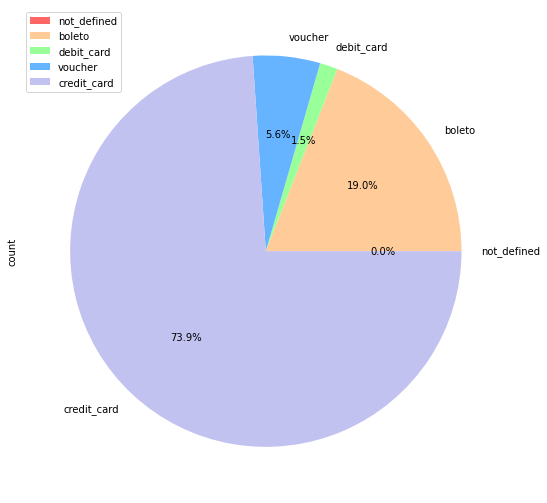

In [7]:
plot = df.plot.pie(y='count', figsize=(9, 9),labels=df.payment_type,autopct='%0.1f%%',colors=('#ff6666','#ffcc99','#99ff99','#66b3ff','#c2c2f0'))

In [8]:
# plt.figure(figsize=(10,4))
# plt.title("Payments distributions - logn scale")
# p1 = sns.kdeplot(payments[payments.payment_type == 'credit_card']['value_log'], color="navy", label='Credit card')
# p2 = sns.kdeplot(payments[payments.payment_type == 'boleto']['value_log'], color="orange", label='Boleto')
# p3 = sns.kdeplot(payments[payments.payment_type == 'voucher']['value_log'], color="green", label='Voucher')
# p4 = sns.kdeplot(payments[payments.payment_type == 'debit_card']['value_log'], color="red", label='Debit card')

## Average ratings per product category

In [9]:
products = pd.read_sql('SELECT * from "products_dataset"',connection)
products_cn = pd.read_sql('SELECT * from "products_category_name_dataset"',connection)


In [10]:
products_cn

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [11]:
reviews = pd.read_sql('SELECT* FROM order_reviews_dataset order_reviews_dataset',connection)

In [12]:
reviews.head()

,id,order_id,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18,2018-01-18 21:46:59
1,2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10,2018-03-11 03:05:13
2,3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17,2018-02-18 14:36:24
3,4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,5,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53


In [13]:
reviews.review_score.unique()

array([4, 5, 1, 3, 2])

array([[<AxesSubplot:title={'center':'review_score'}>]], dtype=object)

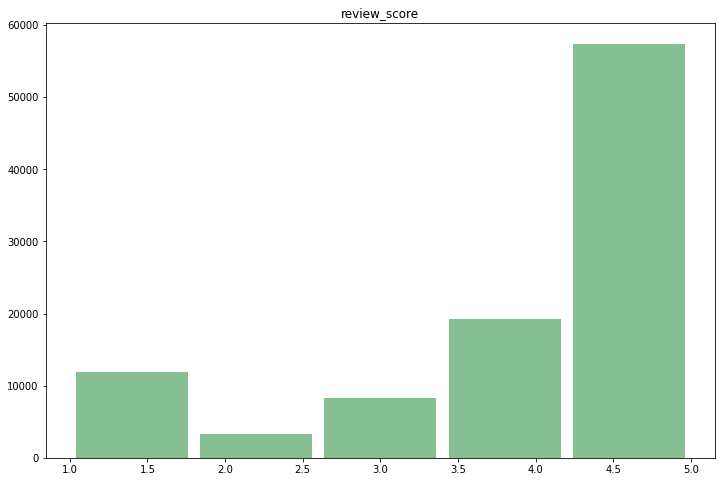

In [14]:
reviews.hist(column='review_score',bins=5,grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

Text(0, 0.5, 'Frequency')

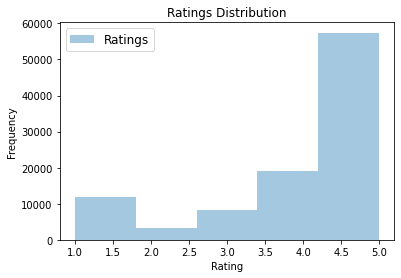

In [15]:
sns.distplot(reviews['review_score'],  kde=False,label='Ratings',bins=5)
plt.legend(prop={'size': 12})
plt.title('Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

In [16]:
payments = pd.read_sql('SELECT* FROM order_payments_dataset',connection)


Text(0, 0.5, 'Frequency')

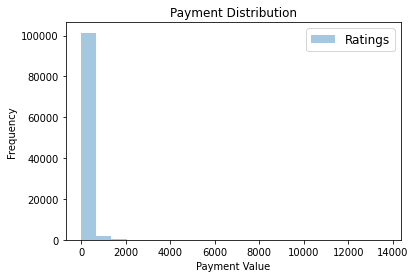

In [17]:
sns.distplot(payments['payment_value'],  kde=False,label='Ratings',bins=20)
plt.legend(prop={'size': 12})
plt.title('Payment Distribution')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')

array([[<AxesSubplot:title={'center':'payment_value'}>]], dtype=object)

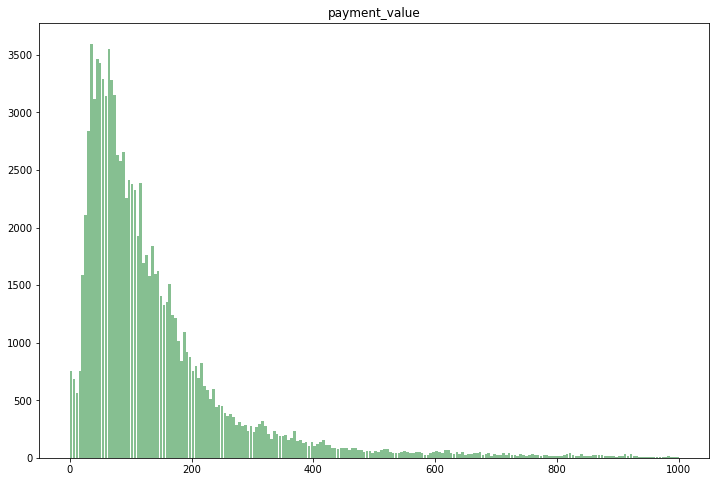

In [18]:
payments.hist(column='payment_value',bins='auto',grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9, range=[0,1000])

array([[<AxesSubplot:title={'center':'payment_value'}>]], dtype=object)

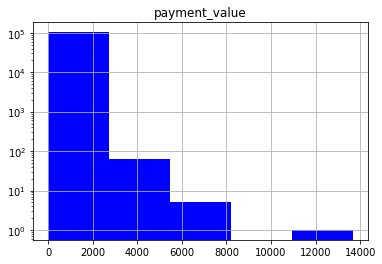

In [19]:
payments.hist(bins=5,log=True,color='b',column='payment_value')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fede027a460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fede027ab20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fede027a100>],
 'medians': [<matplotlib.lines.Line2D at 0x7fede0399220>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fede0399580>],
 'means': []}

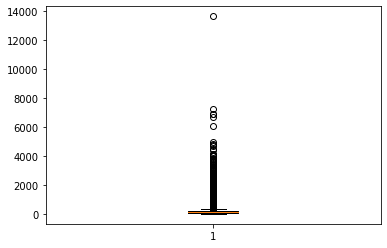

In [20]:

fig1, ax1 = plt.subplots()
ax1.boxplot(payments['payment_value'])

<AxesSubplot:xlabel='payment_value'>

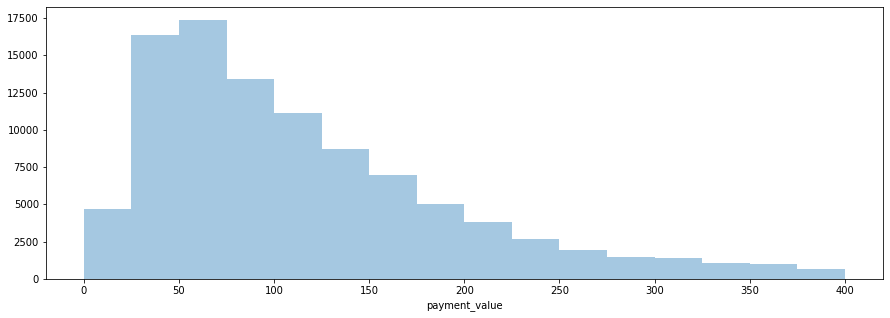

In [21]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.distplot(payments["payment_value"], kde=False,bins=[0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400]) #????? DISTRIBUTION OF payment value!!!

In [22]:
payments.head()

,id,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,1,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,2,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,3,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,5,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [23]:
orders_df = pd.read_sql('SELECT * from "orders_dataset"',connection)


In [24]:
orders_df['month_year'] = pd.to_datetime(orders_df['order_purchase_timestamp']).dt.to_period('M')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,month_year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02


In [25]:
orders_per_month=orders_df.groupby('month_year').order_id.count().reset_index()

In [26]:
payments_timestamp = pd.read_sql('SELECT orders_dataset.order_id,payment_value,order_purchase_timestamp FROM orders_dataset INNER JOIN order_payments_dataset ON orders_dataset.order_id=order_payments_dataset.order_id',connection)

In [27]:
payments_timestamp.head()

,order_id,payment_value,order_purchase_timestamp
0,a9810da82917af2d9aefd1278f1dcfa0,24.39,2018-06-26 11:01:38
1,8ac09207f415d55acff302df7d6a895c,244.15,2018-01-29 14:50:01
2,8cd68144cdb62dc0d60848cf8616d2a4,330.66,2017-08-04 10:08:27
3,d0a945f85ba1074b60aac97ade7e240e,541.00,2018-04-30 20:24:53
4,5d9c5817e278892b7498d90bfa28ade8,290.16,2018-04-26 08:13:54


In [28]:
payments_timestamp['month_year'] = pd.to_datetime(payments_timestamp['order_purchase_timestamp']).dt.to_period('M')
payments_timestamp.head()

,order_id,payment_value,order_purchase_timestamp,month_year
0,a9810da82917af2d9aefd1278f1dcfa0,24.39,2018-06-26 11:01:38,2018-06
1,8ac09207f415d55acff302df7d6a895c,244.15,2018-01-29 14:50:01,2018-01
2,8cd68144cdb62dc0d60848cf8616d2a4,330.66,2017-08-04 10:08:27,2017-08
3,d0a945f85ba1074b60aac97ade7e240e,541.00,2018-04-30 20:24:53,2018-04
4,5d9c5817e278892b7498d90bfa28ade8,290.16,2018-04-26 08:13:54,2018-04


In [29]:
payments_per_month=payments_timestamp.groupby('month_year').payment_value.sum().reset_index()

In [30]:
payments_per_month

,month_year,payment_value
0,2016-09,252.24
1,2016-10,59090.48
2,2016-12,19.62
3,2017-01,138488.04
4,2017-02,291908.01
5,2017-03,449863.60
6,2017-04,417788.03
7,2017-05,592918.82
8,2017-06,511276.38
9,2017-07,592382.92


Text(0, 0.5, 'Orders')

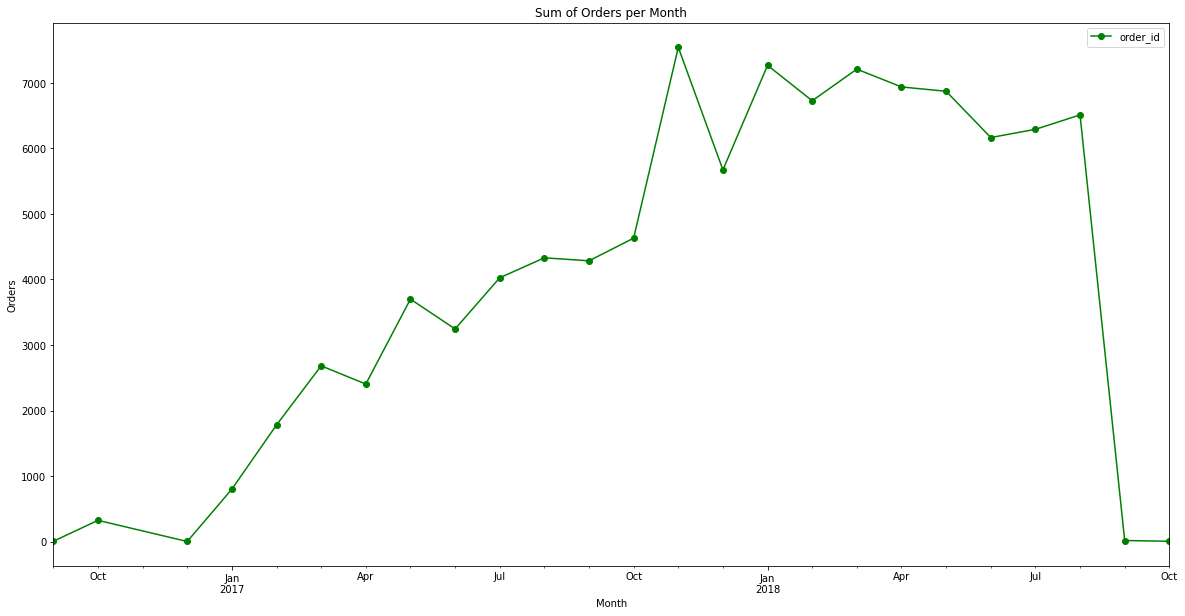

In [31]:
orders_per_month.plot(figsize = (20,10),x ='month_year', y='order_id', kind = 'line',color='green',marker='o')

plt.title('Sum of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Orders')

Text(0, 0.5, 'Total Payment Value')

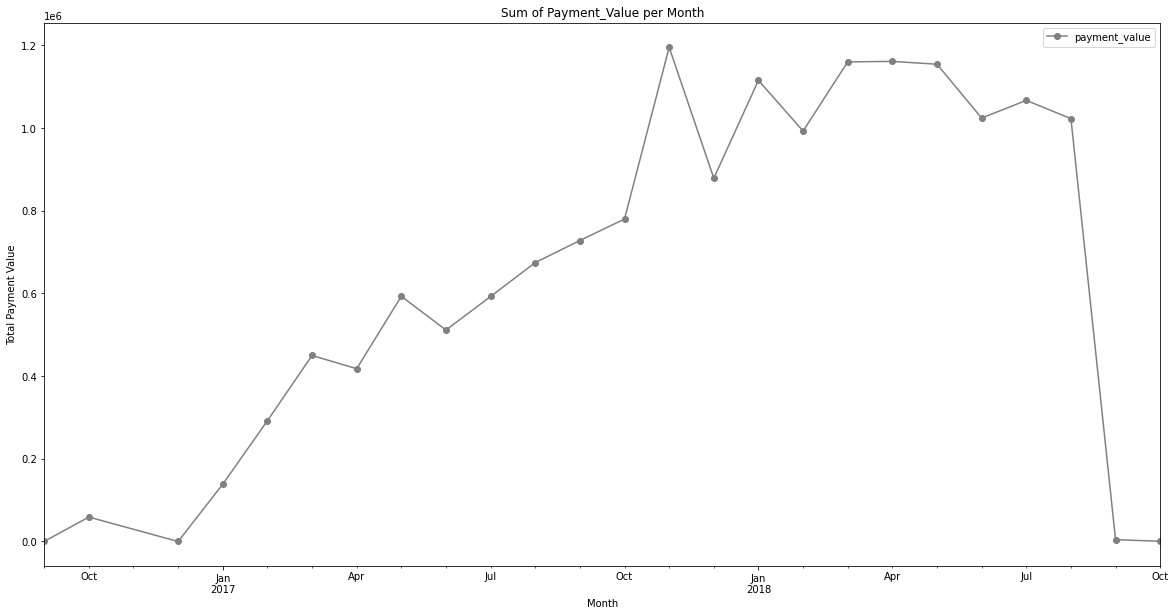

In [32]:

payments_per_month.plot(figsize = (20,10),x ='month_year', y='payment_value', kind = 'line',color='grey',marker='o')
plt.title('Sum of Payment_Value per Month')
plt.xlabel('Month')
plt.ylabel('Total Payment Value')

In [33]:

z=pd.merge(orders_per_month,payments_per_month, on='month_year')

In [34]:
z.head()

,month_year,order_id,payment_value
0,2016-09,4,252.24
1,2016-10,324,59090.48
2,2016-12,1,19.62
3,2017-01,800,138488.04
4,2017-02,1780,291908.01


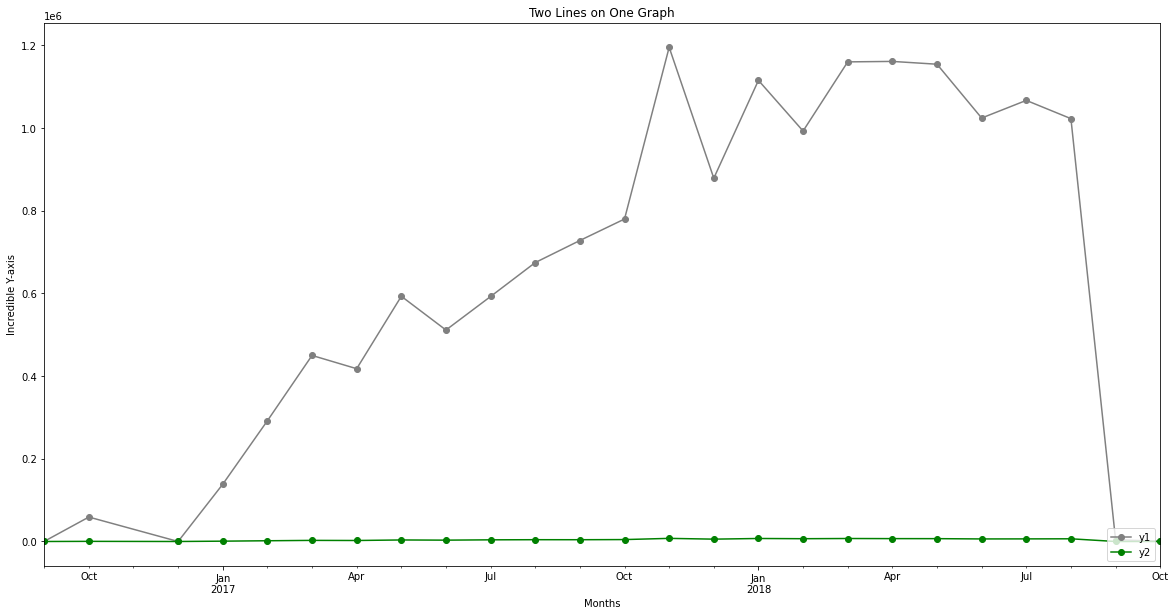

In [35]:
import matplotlib.pyplot as plt
fig1=plt.figure()
ax=fig1.add_subplot(111)
z.plot(figsize = (20,10),x ='month_year', y='payment_value', kind = 'line',color='grey',marker='o',ax=ax)
z.plot(figsize = (20,10),x ='month_year', y='order_id', kind = 'line',color='green',marker='o',ax=ax)
plt.title('Two Lines on One Graph')
plt.xlabel('Months')
plt.ylabel('Incredible Y-axis')
plt.legend(['y1','y2'],loc=4)
plt.show() #WHY THEY DO NOT SHOW ON THE SAME PLOT?????

In [37]:
# finally:
#     #closing database connection.
#     if(connection):
#         cursor.close()
#         connection.close()
#         print("PostgreSQL connection is closed")

In [39]:
products = pd.read_sql('SELECT * from "products_dataset"',connection)
products_cn = pd.read_sql('SELECT * from "products_category_name_dataset"',connection)


## Number of orders per product category

In [40]:
order_items_dataset = pd.read_sql('SELECT * FROM order_items_dataset',connection)

In [41]:
order_items_dataset

,id,order_id,order_item_id,product_id,seller_id,shipping_date_limit,price,freight_value
0,1,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,2,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,4,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,5,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...,...
112645,112646,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,112647,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,112648,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,112649,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [45]:
product_id_dataset = pd.read_sql('SELECT * from orders_dataset INNER JOIN order_items_dataset ON order_items_dataset.order_id = orders_dataset.order_id INNER JOIN products_dataset ON order_items_dataset.product_id=products_dataset.product_id',connection)


In [46]:
product_id_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,id,order_id,...,freight_value,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06,14,0008288aa423d2a3f00fcb17cd7d8719,...,13.37,368c6c730842d78016ad823897a372db,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
1,0008288aa423d2a3f00fcb17cd7d8719,2355af7c75e7c98b43a87b2a7f210dc5,delivered,2018-02-13 22:10:21,2018-02-15 03:55:52,2018-02-20 18:23:28,2018-02-26 13:55:22,2018-03-06,15,0008288aa423d2a3f00fcb17cd7d8719,...,13.37,368c6c730842d78016ad823897a372db,ferramentas_jardim,57.0,366.0,2.0,1650.0,30.0,22.0,30.0
2,0009792311464db532ff765bf7b182ae,2a30c97668e81df7c17a8b14447aeeba,delivered,2018-08-14 20:43:09,2018-08-15 12:15:10,2018-08-15 15:28:00,2018-08-22 12:02:27,2018-08-28,16,0009792311464db532ff765bf7b182ae,...,27.65,8cab8abac59158715e0d70a36c807415,esporte_lazer,56.0,1392.0,4.0,1050.0,40.0,20.0,30.0
3,000e906b789b55f64edcb1f84030f90d,6a3b2fc9f270df258605e22bef19fd88,delivered,2017-11-21 18:54:23,2017-11-21 19:09:02,2017-11-22 20:46:54,2017-12-09 17:27:23,2017-12-07,22,000e906b789b55f64edcb1f84030f90d,...,11.85,57d79905de06d8897872c551bfd09358,telefonia,59.0,540.0,4.0,300.0,17.0,4.0,12.0
4,0014ae671de39511f7575066200733b7,41065d9dcea52218c3943d2eed072b97,delivered,2017-05-22 13:49:03,2017-05-23 03:15:24,2017-05-29 09:04:02,2017-06-07 13:52:52,2017-06-13,36,0014ae671de39511f7575066200733b7,...,14.10,23365beed316535b4105bd800c46670e,telefonia,56.0,351.0,1.0,350.0,19.0,4.0,11.0


In [47]:
count_ordered_productcategories=product_id_dataset.groupby(['product_category_name']).size().reset_index(name='counts')

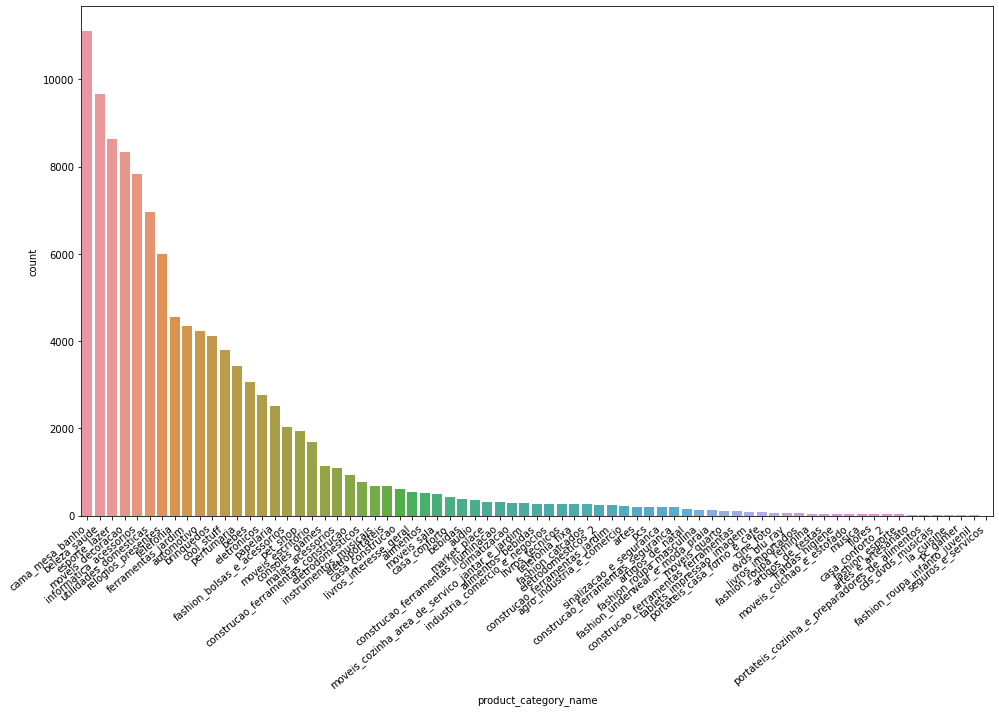

In [51]:
plt.figure(figsize=(14,10))
ax = sns.countplot(x=("product_category_name"),
                 data=product_id_dataset,order=product_id_dataset['product_category_name'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()